<br>
<br>
<center>
    
# 人工智能高阶人才培训班

<br>

> ## 第三课：深度学习基础设施与工具(2)
</center>
<br>

# 线性回归与随机梯度下降演示代码

> 本部分代码用于演示随机梯度下降的基本过程

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 从线性回归问题谈起

In [2]:
#1000 data points 
NUM_EXAMPLES = 300

In [3]:
#define inputs and outputs with some noise 
X = tf.random.normal([NUM_EXAMPLES])  #inputs 
noise = tf.random.normal([NUM_EXAMPLES]) #noise 
W_,b_ = 3,2
y = X * W_ + b_ + noise  #true output

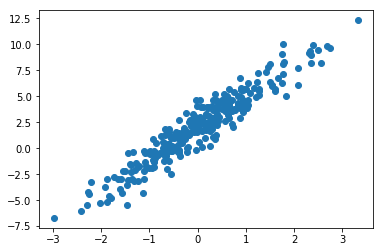

In [4]:
plt.scatter(X,y)

### 定义损失函数

In [5]:
# Mean square error.
def mse(y_hat, y):
    #calcuate the loss (difference squared error)
    error = y_hat - y
    loss = tf.reduce_mean(tf.square(error))
    return loss

假设我们瞎蒙了一组参数w0=1,b0=-5,我们通过计算一个估计值`y_hat`，然后通过计算损失函数来评估我们的猜测

In [6]:
W0=1 
b0=-5
y_hat0 = W0 * X + b0
mse(y_hat0, y)

<tf.Tensor: id=48, shape=(), dtype=float32, numpy=54.952324>

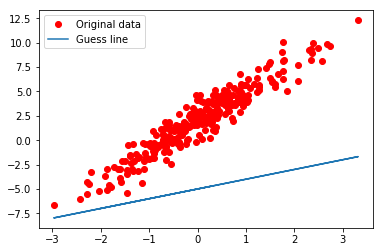

In [7]:
# Graphic display
plt.plot(X, y, 'ro', label='Original data')
plt.plot(X, y_hat0, label='Guess line')
plt.legend()
plt.show()

### 梯度下降
> 优化算法的目标是寻找一组合适的参数`w,b` 使得`mse`损失最小；

> 梯度下降就是这么一种算法

In [8]:
def update():
  #watch the gradient flow 
  with tf.GradientTape() as tape:
    
    #forward pass 
    yhat = X * W + b
    
    #calcuate the loss (difference squared error)
    error = yhat - y
    loss = tf.reduce_mean(tf.square(error))
  
  #evalute the gradient with the respect to the paramters
  dW, db = tape.gradient(loss, [W, b])

  #update the paramters using Gradient Descent  
  W.assign_sub(dW * learning_rate)
  b.assign_sub(db* learning_rate)
  return loss,W,b
    

#### 定义相关超参数

In [9]:
#training info
train_steps = 200
learning_rate = 0.01
W = tf.Variable(0.)
b = tf.Variable(0.)

In [10]:
for i in range(train_steps):
  
  loss,W,b = update()
  #print the loss every 20 iterations 
  if i % 20 == 0:
    print("Loss at step {:03d}: {:.3f}".format(i, loss))
print("W: %3f, b: %3f" %(W.numpy(), b.numpy()))      

Loss at step 000: 14.821
Loss at step 020: 7.012
Loss at step 040: 3.630
Loss at step 060: 2.165
Loss at step 080: 1.531
Loss at step 100: 1.255
Loss at step 120: 1.136
Loss at step 140: 1.085
Loss at step 160: 1.062
Loss at step 180: 1.052
W: 2.988727, b: 1.994082


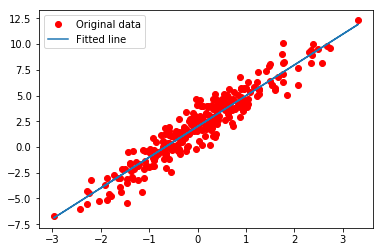

In [11]:
# Graphic display
plt.plot(X, y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

### 动画演示

In [12]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [13]:
#create model paramters with initial values 
W = tf.Variable(0.)
b = tf.Variable(0.)

fig = plt.figure()
plt.scatter(X, y, c='orange')
line, = plt.plot(X, np.array(W * X + b))
plt.close()

def animate(i):
    update()
    line.set_ydata(np.array(W * X + b))
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

### 练习
1. 尝试修改下学习率，看看变化情况；
2. 尝试修改w，b的初始值，看下收敛速度；
3. 迭代次数多少有差别么？

## 不同学习率下，SGD的表现

<video src="./img/lr001.mp4" controls="controls"> </video> 

<video src="./img/lr0.1.mp4" controls="controls"> </video> 

<video src="./img/lr0.7.mp4" controls="controls"> </video> 

<video src="./img/lr0.99.mp4" controls="controls"> </video> 

<video src="./img/lr1.01.mp4" controls="controls"> </video> 

# 更多的解释
> requrements: pytorch,ffmpeg

> conda install -c conda-forge ffmpeg

> Ref: https://nbviewer.jupyter.org/gist/joshfp/85d96f07aaa5f4d2c9eb47956ccdcc88/lesson2-sgd-in-action.ipynb

In [1]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

In [2]:
n = 100
x = torch.ones(n, 2)
x[:,0].uniform_(-1., 1)
x[:5]

tensor([[-0.0581,  1.0000],
        [ 0.5174,  1.0000],
        [ 0.5427,  1.0000],
        [-0.7812,  1.0000],
        [ 0.9995,  1.0000]])

In [3]:
w_y = torch.tensor([3., 2])

In [4]:
y = x@w_y + torch.rand(n)

In [5]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [6]:
def loss_wrt_wgts(w1, w2):
    w = torch.Tensor([w1, w2])
    y_hat = x@w
    return mse(y_hat, y)
loss_wgts = np.vectorize(loss_wrt_wgts)

### 构建梯度变化图

In [7]:
w0_range = np.linspace(-20, 20, 50)
w1_range = np.linspace(-20, 20, 50)
mesh = np.meshgrid(w0_range, w1_range)
loss_mesh = loss_wgts(*mesh)

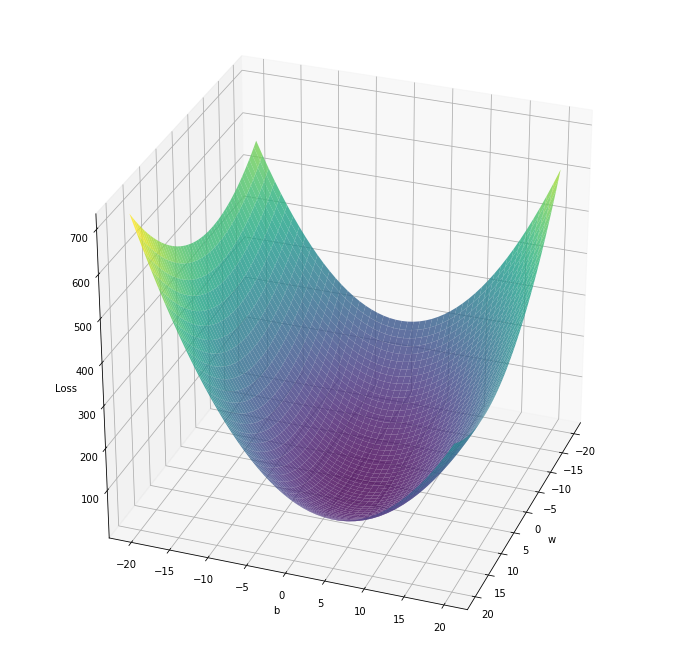

In [8]:
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.plot_surface(*mesh, loss_mesh, cmap='viridis', alpha=0.8)
ax.set_xlabel('w'); ax.set_ylabel('b'); ax.set_zlabel('Loss')
ax.view_init(30, 20)

### 更新梯度下降算法

In [9]:
def update(w):
    y_hat = x@w
    loss = mse(y, y_hat)
    prev_wgts = w.data.clone()   
    loss.backward()
    with torch.no_grad():
        w -= lr * w.grad
        w.grad.zero_()
    return prev_wgts, loss.item()

In [10]:
def train(w0):
    recorder = []
    w = torch.tensor(w0, requires_grad=True)
    for t in range(n_epochs): recorder.append(update(w))
    rec_wgts, rec_loss = [list(o) for o in zip(*recorder)]
    rec_wgts = torch.stack(rec_wgts)
    return rec_wgts, rec_loss

### 超参及初始化

In [11]:
# hyper parameters
lr = 0.1
n_epochs = 100

# initial parameters (weights)
w0 = [-18., -18.]

rec_wgts, rec_loss = train(w0)

## 动画

In [14]:
from matplotlib import animation
from matplotlib.gridspec import GridSpec
plt.rc('animation', html='html5')

In [15]:
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 2, width_ratios=[1, 2.5])

# plot ground truth & model
ax0 = fig.add_subplot(gs[0,0])
ax0.scatter(x[:,0], y, c='orange', label='Ground truth')
ax0.set_ylim(-1, 6)
ax0.set_title('Ground truth & Model', fontsize=16)
line0, = ax0.plot([], [], label='Model')
ax0.legend(loc='lower right')

# plot loss 
ax1 = fig.add_subplot(gs[:,1], projection='3d')
ax1.set_title('Loss', fontsize=16, pad=20)
ax1.plot_surface(*mesh, loss_mesh, cmap='viridis', alpha=0.8)
ax1.plot3D([w_y[0]], [w_y[1]], [0], c='r', marker='x', markersize=10, 
           label='Global minimum', linewidth=0)
line1, = ax1.plot3D([], [], [], c='r', marker='o', alpha=0.4, label='loss')
ax1.set_xlabel('w'); ax1.set_ylabel('b'); ax1.set_zlabel('Loss')
ax1.view_init(30, 20)
ax1.legend()

# plot weights & loss
ax2 = fig.add_subplot(gs[1,0])
ax2.set_title('Weights & Loss', fontsize=16)
line2, = ax2.plot([],[], label='w')
line3, = ax2.plot([],[], label='b')
ax2.set_ylim(-20, 5)
ax2.set_xlim(0, n_epochs)
ax2.set_xlabel('epochs')
ax2.set_ylabel('weights')
ax3 = ax2.twinx()
line4, = ax3.plot([],[], label='loss', c='r')
ax3.set_ylabel('loss')
ax3.set_ybound(0, 500)

ax2.legend((line2, line3, line4), ('w', 'b', 'loss'), loc='center right')

ttl = fig.suptitle(f'lr: {lr} - Epoch: 0/{n_epochs}', fontsize=22)
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.close()

def animate(i):   
    line0.set_data(x[:,0].numpy(), (x@rec_wgts[i]).numpy())
    line1.set_data(rec_wgts[:i+1,0].numpy(), rec_wgts[:i+1,1].numpy())
    line1.set_3d_properties(rec_loss[:i+1])
    epochs = np.arange(i+1)
    line2.set_data(epochs, rec_wgts[:i+1, 0].numpy())
    line3.set_data(epochs, rec_wgts[:i+1, 1].numpy())
    line4.set_data(epochs, rec_loss[:i+1])
    ttl.set_text(f'lr: {lr} - Epoch: {i+1}/{n_epochs}')
    return line0, line1, line2, line3, line4, ttl

animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)

## 调整学习率

In [15]:
lr = 0.01
rec_wgts, rec_loss = train(w0)
animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)

In [16]:
lr = 0.7
rec_wgts, rec_loss = train(w0)
animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)

In [17]:
lr = 0.99
rec_wgts, rec_loss = train(w0)
animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)

In [18]:
lr = 1.01
rec_wgts, rec_loss = train(w0)
animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)